# t-SNE Tutorial

In [8]:
import numpy as np
import scipy
import sklearn
import matplotlib.pyplot as plt
from functions import *
from sklearn import manifold, datasets
from sklearn.manifold import TSNE

### Zklastrowane punkty w 2D

Działanie t-SNE na dwóch oddalonych od siebie klastrach punktów w 2D

#### Zadanie 1
Napisz funkcję, która pokaże punkty ze zbioru przed oraz po transformacji t-SNE z zadaną wielkością zbioru oraz perplexity, użyj sklearn.manifold.TSNE inicjalizowane PCA, resztę parametrów pozostaw jako domyślną.

Dokumentacja [t-SNE](http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html)

Funkcje pomocnicze:

*point_cluster(cluster_size)* - generuje losowe dwa klastry punktów 2D o rozmiarze *cluster_size* wraz z ich kolorami

*plot_2D(data, colors)* - rysuje wykres punktów ze współrzędnymi *data* oraz kolorami z *colors*

In [4]:
def plot_2D_cluster(cluster_size, perplexity):
    data, colors = point_cluster(cluster_size)
    tsne = manifold.TSNE(init ='pca', perplexity=perplexity)
    data_tsne = tsne.fit_transform(data)
    plot_2D(data_tsne, colors)

Korzystając z napisanej funkcji pokaż jak zachowuje się t-SNE dla kilku różnych wielkości klastrów (w granicach 10 - 400) i różnych wartości perplexity

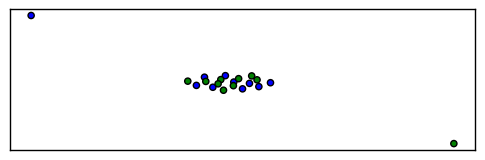

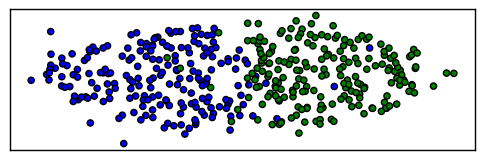

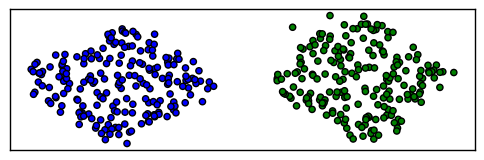

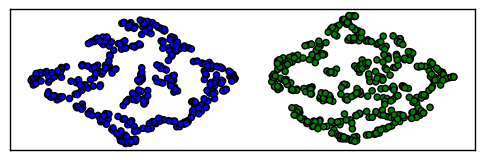

In [5]:
plot_2D_cluster(10, 100)
plot_2D_cluster(200, 10)
plot_2D_cluster(200, 50)
plot_2D_cluster(400, 20)

#### Zadanie 2
Pokaż zależność różnicy (np. jako błędu średniokwadratowego znormalizowanych danych) pomiędzy oryginalnymi, a zredukowanymi odległościami pomiędzy parami punktów w zależności od perplexity. Na wykresie rozróżnij różnicę odległości w bliskim oraz dalekim sąsiedztwie.

Sprawdź jak wygląda wykres dla małych wielkości klastra (np. 10 - 50) oraz dużych (np. 200 - 300). Pokaż co dzieje się z punktami w różnych częściach wykresu.

Zalecany przez autora przedział perplexity to 5 - 50. Sprawdź co dzieje się z ww. różnicą poza tym przedziałem.

Proponowane parametry t-SNE:
- inicjalizacja PCA
- nieco obniżone względem domyślnego learning_rate, np. 500

Pomocne funkcje:

*pairwise_distances(points)* - zwraca macierz euklidesowych odległości między punktami w której komórka i,j oznacza odległość między punktem i a j

*np.where(condition[, x, y])* - [dokumentacja](https://docs.scipy.org/doc/numpy/reference/generated/numpy.where.html)

10


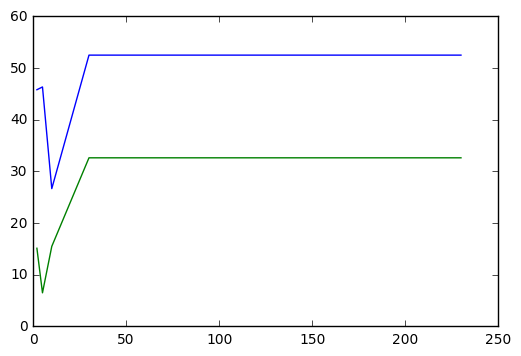

50


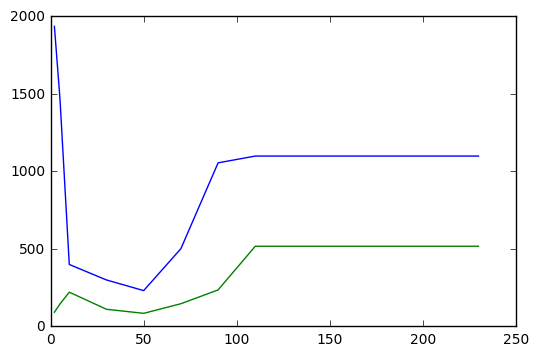

200


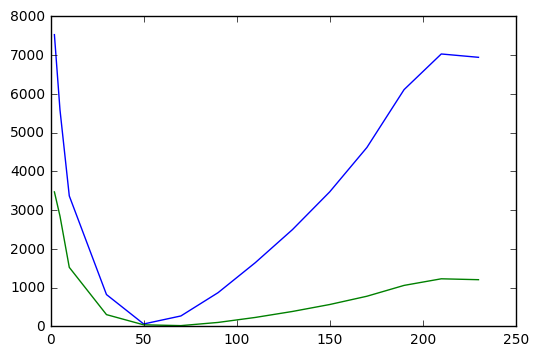

300


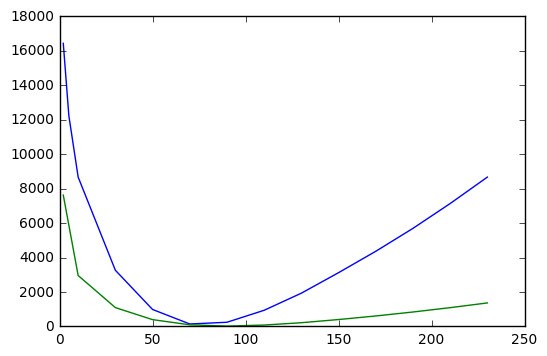

In [9]:
def normalize(d):
    return d / np.max(d)

for size in [10, 50, 200, 300]:
    print size
    data, colors = point_cluster(size)
    data_dists = normalize(pairwise_distances(data))
    perplexities = [2, 5] + range(10, 250, 20)
    als = []
    hfs = []
    for ppx in perplexities:
        tsne = manifold.TSNE(n_components = 2, init ='pca', learning_rate = 500, perplexity=ppx)
        data_tsne = tsne.fit_transform(data)
        tsne_dists = normalize(pairwise_distances(data_tsne))
        diff = data_dists - tsne_dists
        median_dist = np.median(data_dists)
        half = np.where(data_dists < median_dist, diff, np.zeros(np.shape(diff)))
        al = np.sum(np.power(data_dists - tsne_dists, 2))
        hf = np.sum(np.power(half, 2))
        als.append(al)
        hfs.append(hf)
    plt.plot(perplexities, als)
    plt.plot(perplexities, hfs)
    plt.show()

### Punkty w wielu wymiarach

Prosty przyklad przedstawiajacy powiększenie mniejszego klastra punktów w wyniku przeprowadzenia redukcji t-SNE

Załadowanie zbioru danych

In [10]:
data, colors = point_cluster_multi(100)

/usr/lib/python2.7/site-packages/numpy/core/numeric.py:297: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  a = empty(shape, dtype, order)


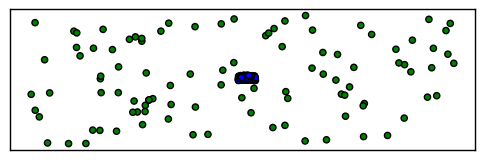

In [12]:
plot_2D(data, colors)

#### Zadanie 3

Przeprowadź redukcję wymiarów przy pomocy t-SNE

In [13]:
tsne = manifold.TSNE(n_components = 2, perplexity = 30, 
                     init='pca', random_state = 0, learning_rate = 100)
data_tsne = tsne.fit_transform(data2)

NameError: name 'data2' is not defined

Wyświetl reprezentację graficzną zredukowanego zbioru przy pomocy funkcji plot_2D

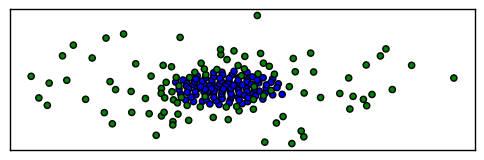

In [8]:
plot2D(data_tsne, colors2)

Zmieniając parametry spróbuj doprowadzić do sytuacji w której niebieskie punkty znajdują sie bliżej siebie w centrum. 

Wykorzystaj zmianę parametru learning_rate.

### Zbiór ręcznie napisanych cyfr

Załadowanie zbioru danych

In [10]:
digits = datasets.load_digits(n_class=6)
X = digits.data

#### Zadanie 4

Przeprowadź redukcję przy pomocy t-SNE

In [14]:
tsne = manifold.TSNE(n_components=2, perplexity=70)
X_tsne = tsne.fit_transform(X)

Wyświetl wizualizację zredukowanego zbioru przy pomocy funkcji plot_digits(zbiór zredukowany, pierwotny zbiór cyfr)

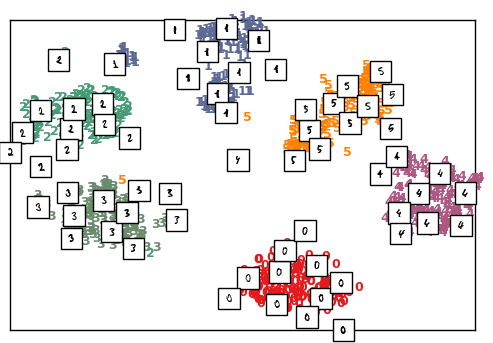

In [15]:
plot_digits(X_tsne, digits)

### Zbiór zdjęć twarzy

Załadowanie zbioru danych

downloading Olivetti faces from http://cs.nyu.edu/~roweis/data/olivettifaces.mat to /home/fazzou/scikit_learn_data


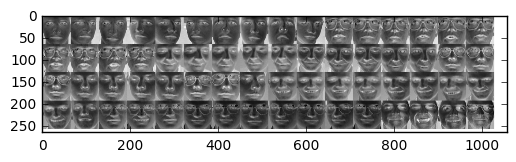

In [16]:
faces = datasets.fetch_olivetti_faces()
draw_faces(faces)

#### Zadanie 5

Przeprowadź redukcję zbioru zdjęć przy pomocy t-SNE

In [17]:
tsne = manifold.TSNE(n_components=2, early_exaggeration = 16.0, perplexity= 50, init='pca', n_iter=5000)
face_tsne = tsne.fit_transform(faces.data)

Wyświetl wizualizację zredukowanego zbioru przy pomocy funkcji plot_faces(zbiór zredukowany, pierwotny zbiór twarzy)

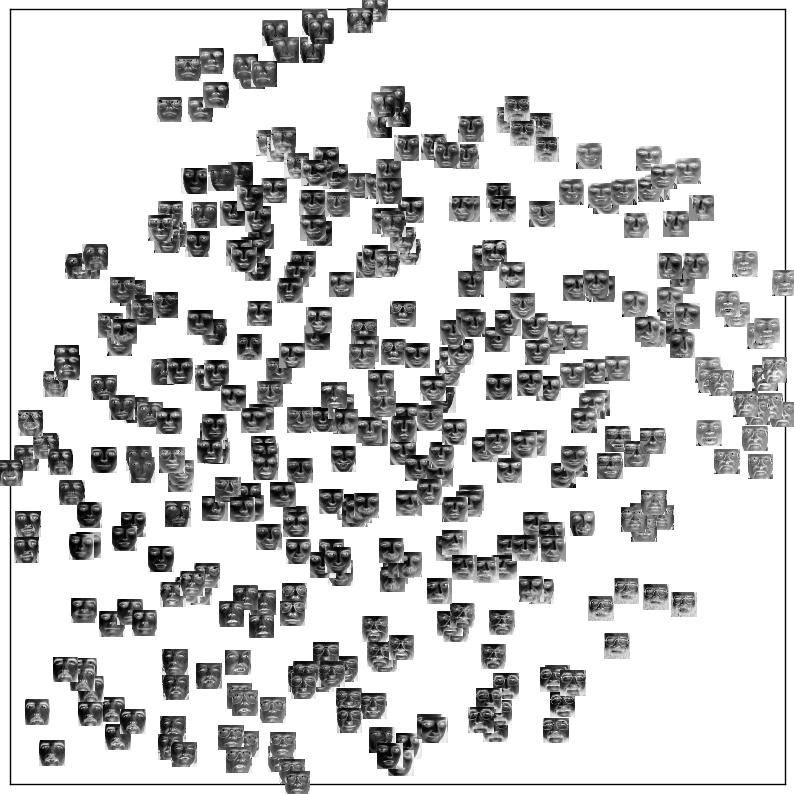

In [18]:
plot_faces(face_tsne, faces)